In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [6]:
world = pd.read_excel('dataset/Word Rank University.xlsx')
times = pd.read_excel("dataset/Times Higher Education.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/Word Rank University.xlsx'

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
times.head(20)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Arizona State University (Tempe),https://www.timeshighereducation.com/world-uni...,United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9–86.9,96.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,=7,University of Alberta,https://www.timeshighereducation.com/world-uni...,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,=7,RMIT University,https://www.timeshighereducation.com/world-uni...,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,=9,Aalborg University,https://www.timeshighereducation.com/world-uni...,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,=9,University of Victoria,https://www.timeshighereducation.com/world-uni...,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Rank: means ranking the top in the world
# University name same
# ranking-institution-title href: is not working when clicking on the link
# Location: the country of the university
# The dataset is a bit diffferebr because it focusses on the Sustainability impact factors
# 1591 rows, 20 columns


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
times.info()
# the ranking column is an object datatype caused by the some rows containing a range rather than a single column
# the same goes for the national rank 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [ ]:
times.shape

(1591, 20)

In [ ]:
times.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
times.columns

Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-score-multi__value 8'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# Yes, the data that was provided in Kaggle is reliable and was collected from the original source which is “Times Higher Education”. 
# This is considered a reliable source because they have been providing university ranking since 2004 and they have been collecting data via surveys and academic institutions. 
# Evidence: https://www.timeshighereducation.com/rankings/impact/overall/2023



#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# The data is not up to date. It is 2023 data and there is 2024 data but it is not open therefore we can't use it. 
# There is a solution that we use data scraping techniques but it is out of our expertise.


In [ ]:
times

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,https://www.timeshighereducation.com/world-uni...,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,https://www.timeshighereducation.com/world-uni...,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,https://www.timeshighereducation.com/world-uni...,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,https://www.timeshighereducation.com/world-uni...,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# Yes, the data is consistent throughout all the columns, and the data are the same as the data source.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# Yes, the given data is relevant and can be used to answer the questions, 
# because the questions ask about universities global ranking.

In [ ]:
# dropped the column university link because we won't get any useful info from it
times.drop(["ranking-institution-title href"], axis = 1, inplace = True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
times.duplicated().sum()


0

In [ ]:
times["Rank"].duplicated().sum()

1527

In [ ]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
times.isnull().sum()

Rank                            0
University Name                 0
Location                       91
sdg-score-multi__number       724
sdg-score-multi__value        724
sdg-score-multi__number 2     765
sdg-score-multi__value 2      766
sdg-score-multi__number 3     779
sdg-score-multi__value 3      786
sdg-score-multi__value 4        8
scores                          0
sdg-score-multi__number 5    1026
sdg-score-multi__value 5     1034
sdg-score-multi__number 6    1093
sdg-score-multi__value 6     1095
sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__number 8    1108
sdg-score-multi__value 8     1108
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
# check columns types 
times.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number      float64
sdg-score-multi__value        object
sdg-score-multi__number 2    float64
sdg-score-multi__value 2      object
sdg-score-multi__number 3    float64
sdg-score-multi__value 3      object
sdg-score-multi__value 4      object
scores                        object
sdg-score-multi__number 5    float64
sdg-score-multi__value 5      object
sdg-score-multi__number 6    float64
sdg-score-multi__value 6      object
sdg-score-multi__number 7    float64
sdg-score-multi__value 7      object
sdg-score-multi__number 8    float64
sdg-score-multi__value 8      object
dtype: object

In [ ]:
# go to clean them 

In [ ]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
# To handle the values correctly with their data types that we want to change according to their use later:
# We will change the column names and to split the values and take only the first number (not the range)
# We did this step here because we want to deal the the uniqueness of total score after it

times.columns = ["Rank", "University Name", "Location", "Category 1", "Score 1", "Category 2", "Score 2",
                 "Category 3", "Score 3", "Score 4", "Total scores", "Category 5", "Score 5", "Category 6", "Score 6",
                 "Category 7", "Score 7", "Category 8", "Score 8"]


# change to string to split the range
times["Score 1"] = times["Score 1"].astype(str)
times["Score 2"] = times["Score 2"].astype(str)
times["Score 3"] = times["Score 3"].astype(str)
times["Score 4"] = times["Score 4"].astype(str)
times["Score 5"] = times["Score 5"].astype(str)
times["Score 6"] = times["Score 6"].astype(str)
times["Score 7"] = times["Score 7"].astype(str)
times["Score 8"] = times["Score 8"].astype(str)



# split the range and take the first number of the rank
times["Rank"] = times["Rank"].map(lambda x: x.split("+")[0] if "+" in x else x) 
times["Rank"] = times["Rank"].map(lambda x: x.split("–")[0] if "–" in x else x) 
times["Rank"] = times["Rank"].map(lambda x: x.split("=")[1] if "=" in x else x)


# split the range and take the first number of the rank 
times["Score 1"] = times["Score 1"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 2"] = times["Score 2"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 3"] = times["Score 3"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 4"] = times["Score 4"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 5"] = times["Score 5"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 6"] = times["Score 6"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 7"] = times["Score 7"].map(lambda x: x.split("–")[0] if "–" in x else x)
times["Score 8"] = times["Score 8"].map(lambda x: x.split("–")[0] if "–" in x else x)


# split the range and take the first number of the total scores
times["Total scores"] = times["Total scores"].map(lambda x: x.split("–")[0] if "–" in x else x)

# split the university name details and take only university names
world['University Names_new'] = world['University Names'].map(lambda x: x.split('\n')[0])


# change the data types to their accuare type after handling them
times["Rank"] = times["Rank"].astype(int)
times["Score 1"] = times["Score 1"].astype(float)
times["Score 2"] = times["Score 2"].astype(float)
times["Score 3"] = times["Score 3"].astype(float)
times["Score 4"] = times["Score 4"].astype(float)
times["Score 5"] = times["Score 5"].astype(float)
times["Score 6"] = times["Score 6"].astype(float)
times["Score 7"] = times["Score 7"].astype(float)
times["Score 8"] = times["Score 8"].astype(float)
times["Total scores"] = times["Total scores"].astype(float)


In [ ]:
times

,Rank,University Name,Location,Category 1,Score 1,Category 2,Score 2,Category 3,Score 3,Score 4,Total scores,Category 5,Score 5,Category 6,Score 6,Category 7,Score 7,Category 8,Score 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001,Zarqa University,Jordan,NaN,NaN,NaN,NaN,1.0,23.3,1.5,7.9,NaN,NaN,4.0,43.6,3.0,32.1,NaN,NaN
1587,1001,Zewail City of Science and Technology,Egypt,3.0,44.7,7.0,11.1,NaN,NaN,45.3,7.9,1.0,54.5,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001,Zhytomyr Ivan Franko State University,Ukraine,NaN,NaN,10.0,3.9,NaN,NaN,1.5,7.9,NaN,NaN,8.0,35.7,5.0,43.7,NaN,NaN
1589,1001,University of Žilina,Slovakia,11.0,20.9,NaN,NaN,NaN,NaN,1.5,7.9,NaN,NaN,9.0,17.2,NaN,NaN,4.0,2.8


In [ ]:
# Uniquenes:

# Creating new column for ranks that will be ordered more effieciently 
#times["Rank"] = times["Rank_new"]
#times.drop(["Rank_new"], axis = 1, inplace = True)

In [ ]:
# We will do the step of completeness with uniqueness

# making a dictionary from 'University Names_new' and 'Location' columns
university_loc = dict(zip(world['University Names_new'], world['Location ']))
# making a list of unique names from the 'world' dataframe to find them in the Times dataframe so we can match locations
set1 = list(set(world['University Names_new']))
set1 = list(map(lambda x : x.strip(), set1))
clean_names = set1
# creating a 'Location' column in times dataframe, and filling the values based on the names and locations dictionary we got from the 'world' dataframe
# if names match in each dataframe, then it is the same location
def locfun(university_name):
    for key in university_loc:
        if key in university_name:
            return university_loc.get(key)

    return university_loc.get(university_name)

times['Location_new'] = times['University Name'].apply(locfun)
# merging Location column by filling the missing values with the values of the Location_new column
times['Location'] = times['Location'].fillna(times['Location_new'])
# fill the remaining 'Location' null values with 'Unknown'
times['Location'] = times['Location'].fillna("Unknown")

In [ ]:
university_loc

{'Harvard University': 'USA',
 'Massachusetts Institute of Technology': 'USA',
 'Stanford University': 'USA',
 'University of Cambridge': 'United Kingdom',
 'University of Oxford': 'United Kingdom',
 'Princeton University': 'USA',
 'University of Chicago': 'USA',
 'Columbia University': 'USA',
 'University of Pennsylvania': 'USA',
 'Yale University': 'USA',
 'California Institute of Technology': 'USA',
 'University of California, Berkeley': 'USA',
 'University of Tokyo': 'Japan',
 'Cornell University': 'USA',
 'Northwestern University': 'USA',
 'University of Michigan, Ann Arbor': 'USA',
 'Johns Hopkins University': 'USA',
 'University of California, Los Angeles': 'USA',
 'University College London': 'United Kingdom',
 'Duke University': 'USA',
 'PSL University': 'France',
 'University of Illinois at Urbana–Champaign': 'USA',
 'University of Toronto': 'Canada',
 'New York University': 'USA',
 'University of Washington': 'USA',
 'McGill University': 'Canada',
 'Kyoto University': 'Japan

In [ ]:
times.fillna(0,inplace=True)
times.drop(['Location_new'],axis=1,inplace=True)


In [ ]:
# To make the score ordered with the new ranking 

lst = list(times["Total scores"])
lst.sort(reverse = True)
lst = set(lst)

lst2 = [x for x in range(1, len(lst) + 1)]
lst2[-1]

var1 = dict(zip(lst, lst2))

In [ ]:

lst = list(lst)
lst.sort(reverse = True)
lst
var1 = dict(zip(lst, lst2))
var1
times["Rank_new"] = times['Total scores'].map(var1)


In [ ]:
col = times.pop("Rank_new")
times.insert(1, col.name, col)

times.head(20)

,Rank,Rank_new,University Name,Location,Category 1,Score 1,Category 2,Score 2,Category 3,Score 3,Score 4,Total scores,Category 5,Score 5,Category 6,Score 6,Category 7,Score 7,Category 8,Score 8
0,1,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9,96.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,8,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,8,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
times.duplicated().sum()

0

In [ ]:
# go back to 6th dimention --> Completeness

In [ ]:
# Completeness cleaning:
# We merged the steps of uniqueness and completeness together because some of the steps handls the same problems of them 




In [ ]:
times.isnull().sum()

Rank               0
Rank_new           0
University Name    0
Location           0
Category 1         0
Score 1            0
Category 2         0
Score 2            0
Category 3         0
Score 3            0
Score 4            0
Total scores       0
Category 5         0
Score 5            0
Category 6         0
Score 6            0
Category 7         0
Score 7            0
Category 8         0
Score 8            0
dtype: int64

### Correcting errors

-------------------

In [ ]:
# Accuracy checking: 

In [ ]:
# Accuracy checing: Rank column values
# we did it in the completeness and uniqueness steps
# cell 110


In [ ]:
# Accuracy checking: separating the range in scores columns
# we did it in the completeness and uniqueness steps
# cell 111


In [ ]:
# Accuracy checking: Total scores 
# we did it in the completeness and uniqueness steps
# cell 112


In [ ]:
# Accuarcy checking: types of columns
# we did it in the completeness and uniqueness steps
# cell 113 


In [ ]:
times.dtypes

Rank                 int32
Rank_new             int64
University Name     object
Location            object
Category 1         float64
Score 1            float64
Category 2         float64
Score 2            float64
Category 3         float64
Score 3            float64
Score 4            float64
Total scores       float64
Category 5         float64
Score 5            float64
Category 6         float64
Score 6            float64
Category 7         float64
Score 7            float64
Category 8         float64
Score 8            float64
dtype: object

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
times.head(10)

,Rank,Rank_new,University Name,Location,Category 1,Score 1,Category 2,Score 2,Category 3,Score 3,Score 4,Total scores,Category 5,Score 5,Category 6,Score 6,Category 7,Score 7,Category 8,Score 8
0,1,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9,96.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,8,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,8,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
top_university =times[['Rank_new','University Name']].head(13)



In [ ]:
# Q1 Answer- take it down at the end of cells later 
top_university

,Rank_new,University Name
0,1,Western Sydney University
1,2,University of Manchester
2,3,Queen’s University
3,4,Universiti Sains Malaysia
4,5,University of Tasmania
5,6,Arizona State University (Tempe)
6,7,University of Alberta
7,7,RMIT University
8,8,Aalborg University
9,8,University of Victoria


<function matplotlib.pyplot.show(close=None, block=None)>

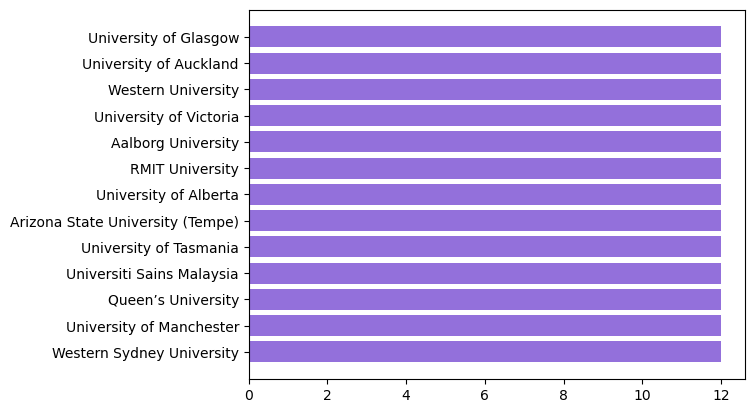

In [ ]:
# Univarient visualization on one varieble
plt.barh(top_university['University Name'],
        width=(12),
         color=['mediumpurple']
        )
plt.show

(array([  3.,   2.,   3.,   4.,   4.,   3.,   2.,   2.,   4.,   4.,   4.,
          3.,   3.,   7.,   6.,   2.,   4.,   3.,   3.,   3.,   4.,   5.,
          6.,   6.,   5.,   3.,   4., 199., 299., 991.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ,
        24.1, 26.2, 28.3, 30.4, 32.5, 34.6, 36.7, 38.8, 40.9, 43. , 45.1,
        47.2, 49.3, 51.4, 53.5, 55.6, 57.7, 59.8, 61.9, 64. ]),
 <BarContainer object of 30 artists>)

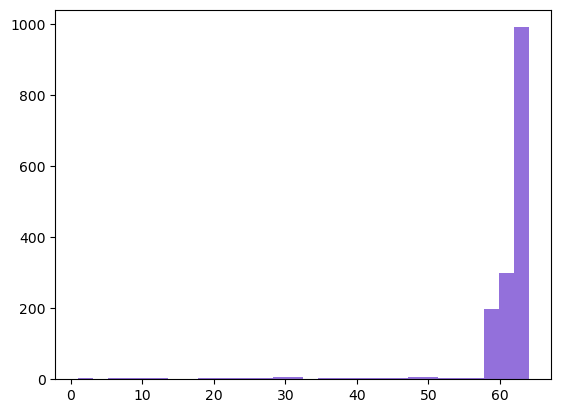

In [ ]:
# Univarient visualization on one varieble
# comment: 
plt.hist(times['Rank_new'],
         color=['mediumpurple'],
         bins=30
        )

(array([102.,  99., 100., 100., 199.,   0., 205.,   0., 195., 591.]),
 array([1.000e+00, 1.010e+02, 2.010e+02, 3.010e+02, 4.010e+02, 5.010e+02,
        6.010e+02, 7.010e+02, 8.010e+02, 9.010e+02, 1.001e+03]),
 <BarContainer object of 10 artists>)

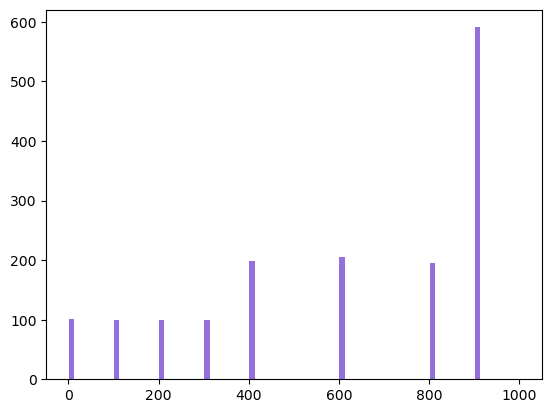

In [ ]:
# Univarient visualization on one varieble
# comment:
plt.hist(times['Rank'],
         width=(12),
         color=['mediumpurple']
        )

In [ ]:
#times

<function matplotlib.pyplot.show(close=None, block=None)>

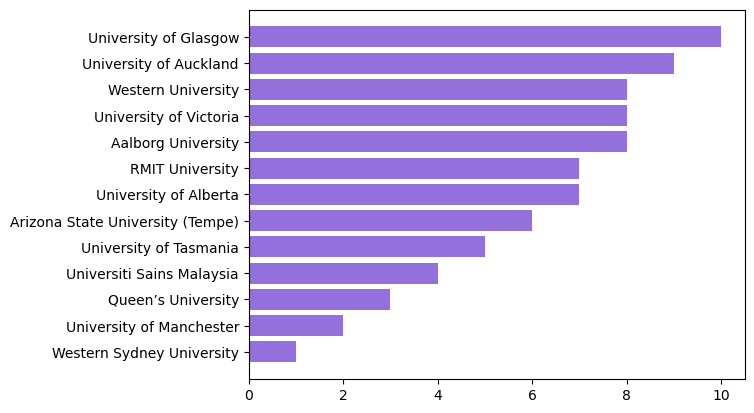

In [ ]:
# Q1 Answer- take it down at the end of cells later 
# BI-Varient visualization for two variebles
plt.barh(top_university['University Name'],
        top_university['Rank_new'],
        
        color=['mediumpurple']
       )
#plt.grid()
plt.show

In [ ]:
score_counts = times["Total scores"]
score_counts

0       99.4
1       97.5
2       97.2
3       96.9
4       96.6
        ... 
1586     7.9
1587     7.9
1588     7.9
1589     7.9
1590     7.9
Name: Total scores, Length: 1591, dtype: float64

In [ ]:
times[times['Total scores']==7.9].value_counts().sum()


591

In [ ]:
times[times['Total scores']==7.9]

,Rank,Rank_new,University Name,Location,Category 1,Score 1,Category 2,Score 2,Category 3,Score 3,Score 4,Total scores,Category 5,Score 5,Category 6,Score 6,Category 7,Score 7,Category 8,Score 8
1000,1001,64,Université 8 Mai 1945 Guelma,Algeria,0.0,0.0,1.0,38.2,0.0,0.0,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,4.0,51.0
1001,1001,64,University Abdelhamid Ibn Badis Mostaganem,Algeria,0.0,0.0,4.0,2.8,10.0,3.9,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,34.4
1002,1001,64,Abdelmalek Essaâdi University,Morocco,0.0,0.0,15.0,47.8,6.0,49.3,45.3,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,1001,64,Abdul Wali Khan University Mardan,Pakistan,0.0,0.0,0.0,0.0,1.0,38.2,61.1,7.9,8.0,48.4,0.0,0.0,0.0,0.0,0.0,0.0
1004,1001,64,University of Abou Bekr Belkaïd Tlemcen,Algeria,1.0,49.5,0.0,0.0,8.0,1.4,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001,64,Zarqa University,Jordan,0.0,0.0,0.0,0.0,1.0,23.3,1.5,7.9,0.0,0.0,4.0,43.6,3.0,32.1,0.0,0.0
1587,1001,64,Zewail City of Science and Technology,Egypt,3.0,44.7,7.0,11.1,0.0,0.0,45.3,7.9,1.0,54.5,0.0,0.0,0.0,0.0,0.0,0.0
1588,1001,64,Zhytomyr Ivan Franko State University,Ukraine,0.0,0.0,10.0,3.9,0.0,0.0,1.5,7.9,0.0,0.0,8.0,35.7,5.0,43.7,0.0,0.0
1589,1001,64,University of Žilina,Slovakia,11.0,20.9,0.0,0.0,0.0,0.0,1.5,7.9,0.0,0.0,9.0,17.2,0.0,0.0,4.0,2.8


In [ ]:

times[times['Total scores']==7.9].head(20)

,Rank,Rank_new,University Name,Location,Category 1,Score 1,Category 2,Score 2,Category 3,Score 3,Score 4,Total scores,Category 5,Score 5,Category 6,Score 6,Category 7,Score 7,Category 8,Score 8
1000,1001,64,Université 8 Mai 1945 Guelma,Algeria,0.0,0.0,1.0,38.2,0.0,0.0,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,4.0,51.0
1001,1001,64,University Abdelhamid Ibn Badis Mostaganem,Algeria,0.0,0.0,4.0,2.8,10.0,3.9,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,5.0,34.4
1002,1001,64,Abdelmalek Essaâdi University,Morocco,0.0,0.0,15.0,47.8,6.0,49.3,45.3,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,1001,64,Abdul Wali Khan University Mardan,Pakistan,0.0,0.0,0.0,0.0,1.0,38.2,61.1,7.9,8.0,48.4,0.0,0.0,0.0,0.0,0.0,0.0
1004,1001,64,University of Abou Bekr Belkaïd Tlemcen,Algeria,1.0,49.5,0.0,0.0,8.0,1.4,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1001,64,Academic City University College,Ghana,0.0,0.0,1.0,23.3,0.0,0.0,1.5,7.9,4.0,2.8,8.0,35.7,0.0,0.0,0.0,0.0
1006,1001,64,Acıbadem University,Turkey,5.0,43.7,8.0,1.4,3.0,73.5,1.5,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,1001,64,Ada Kent University,Northern Cyprus,0.0,0.0,0.0,0.0,11.0,20.9,1.5,7.9,0.0,0.0,4.0,43.6,5.0,22.1,0.0,0.0
1008,1001,64,"Adam Mickiewicz University, Poznań",Poland,13.0,25.7,0.0,0.0,0.0,0.0,61.1,7.9,0.0,0.0,0.0,0.0,10.0,57.6,4.0,35.8
1009,1001,64,Air University,Pakistan,11.0,52.5,0.0,0.0,5.0,51.6,1.5,7.9,0.0,0.0,0.0,0.0,8.0,35.7,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

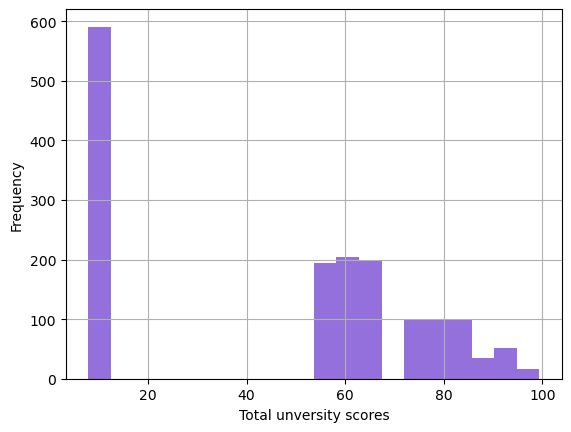

In [ ]:
# We noticed a huge gap between score 7.9 score and almost 50 score that led us to discover more about the data
plt.hist(times['Total scores'],
        bins=20,
         color=('mediumpurple')
)
plt.grid()

plt.xlabel('Total unversity scores')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

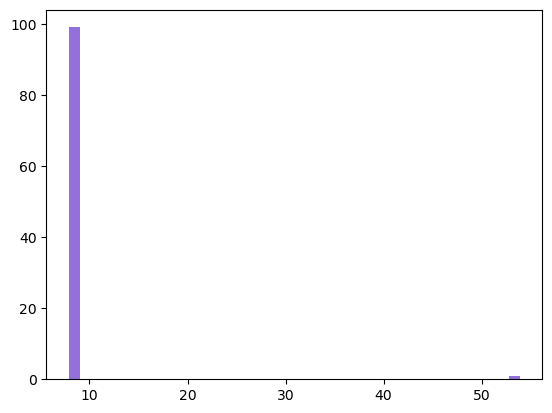

In [ ]:
# This shows the last universities that has minimum score which they are placed at the end of a ranking record
plt.hist(times['Total scores'][999:1099],
            bins=40,
         color=('mediumpurple')


)
#plt.grid()
plt.show

In [ ]:
#times.head(20)

In [ ]:

# Category 1
cat_one = times.where((times['Category 1'] == 8))[['University Name','Category 1','Score 1']]
one_sort = cat_one.sort_values(by='Score 1', ascending=False)
one_sort.columns = ['University Name', 'Category', 'Scores']

# Category 2
cat_two = times.where((times['Category 2'] == 8))[['University Name','Category 2','Score 2']]
two_sort = cat_two.sort_values(by='Score 2', ascending=False)
two_sort.columns = ['University Name', 'Category', 'Scores']

# Category 3
cat_three = times.where((times['Category 3'] == 8))[['University Name','Category 3','Score 3']]
three_sort = cat_three.sort_values(by='Score 3', ascending=False)
three_sort.columns = ['University Name', 'Category', 'Scores']

# Category 5
cat_five = times.where((times['Category 5'] == 8))[['University Name','Category 5','Score 5']]
five_sort = cat_five.sort_values(by='Score 5', ascending=False)
five_sort.columns = ['University Name', 'Category', 'Scores']

# Category 6
cat_six = times.where((times['Category 6'] == 8))[['University Name','Category 6','Score 6']]
six_sort = cat_six.sort_values(by='Score 6', ascending=False)
six_sort.columns = ['University Name', 'Category', 'Scores']

# Category 7
cat_seven = times.where((times['Category 7'] == 8))[['University Name','Category 7','Score 7']]
seven_sort = cat_seven.sort_values(by='Score 7', ascending=False)
seven_sort.columns = ['University Name', 'Category', 'Scores']

# Category 8
cat_eight = times.where((times['Category 8'] == 8))[['University Name','Category 8','Score 8']]
eight_sort = cat_eight.sort_values(by='Score 8', ascending=False)
eight_sort.columns = ['University Name', 'Category', 'Scores']

# Combine all the sorted DataFrames
top10_employment = pd.concat([one_sort, two_sort, three_sort, five_sort, six_sort, seven_sort, eight_sort], axis=0).sort_values(by='Scores', ascending=False).head(13)

top10_employment


,University Name,Category,Scores
7,RMIT University,8.0,83.7
130,IPB University,8.0,83.7
28,Bournemouth University,8.0,83.0
68,University of Pretoria,8.0,82.5
61,University of Wollongong,8.0,82.1
45,University of Johannesburg,8.0,81.8
81,Northumbria University,8.0,81.3
163,Polytechnic University of Valencia,8.0,81.3
57,Istanbul Technical University,8.0,81.1
290,Southern University of Science and Technology ...,8.0,81.0


<function matplotlib.pyplot.show(close=None, block=None)>

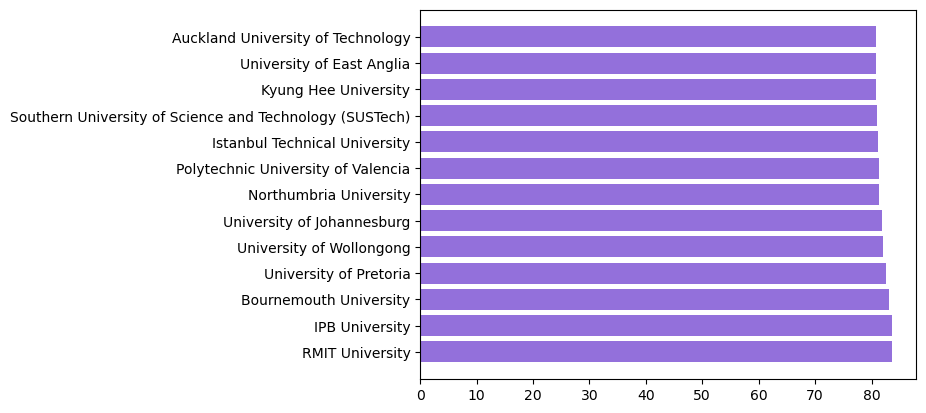

In [ ]:
plt.barh(top10_employment['University Name'],
        top10_employment['Scores'],
         color=('mediumpurple')
        
)
plt.show

In [ ]:
one_sort.shape

(1591, 3)

In [ ]:
two_sort.shape

(1591, 3)

In [ ]:
three_sort.shape

(1591, 3)

In [ ]:
f=times.loc[times['Category 3'] == 8, 'Score 1']
f.head(20)


10     97.7
12     93.1
15     99.9
16     99.0
19     87.7
35     96.6
41     99.3
54     85.3
60     93.0
65     92.9
71     86.3
90     99.6
91     89.1
115    83.5
118    91.0
124    99.8
132    83.7
133    94.7
149    75.6
177    89.0
Name: Score 1, dtype: float64

In [ ]:
cat_one = times.where((times['Category 1'] == 8))[['University Name', 'Category 1', 'Score 1', 'Rank_new']]
one_sort = cat_one.sort_values(by='Score 1', ascending=False)
one_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_two = times.where((times['Category 2'] == 8))[['University Name', 'Category 2', 'Score 2', 'Rank_new']]
two_sort = cat_two.sort_values(by='Score 2', ascending=False)
two_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_three = times.where((times['Category 3'] == 8))[['University Name', 'Category 3', 'Score 3', 'Rank_new']]
three_sort = cat_three.sort_values(by='Score 3', ascending=False)
three_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_five = times.where((times['Category 5'] == 8))[['University Name', 'Category 5', 'Score 5', 'Rank_new']]
five_sort = cat_five.sort_values(by='Score 5', ascending=False)
five_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_six = times.where((times['Category 6'] == 8))[['University Name', 'Category 6', 'Score 6', 'Rank_new']]
six_sort = cat_six.sort_values(by='Score 6', ascending=False)
six_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_seven = times.where((times['Category 7'] == 8))[['University Name', 'Category 7', 'Score 7', 'Rank_new']]
seven_sort = cat_seven.sort_values(by='Score 7', ascending=False)
seven_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


cat_eight = times.where((times['Category 8'] == 8))[['University Name', 'Category 8', 'Score 8', 'Rank_new']]
eight_sort = cat_eight.sort_values(by='Score 8', ascending=False)
eight_sort.columns = ['University Name', 'Category', 'Scores', 'Rank_new']


combined_df = pd.concat([one_sort, two_sort, three_sort, five_sort, six_sort, seven_sort, eight_sort], axis=0).sort_values(by='Scores', ascending=False).head(12)

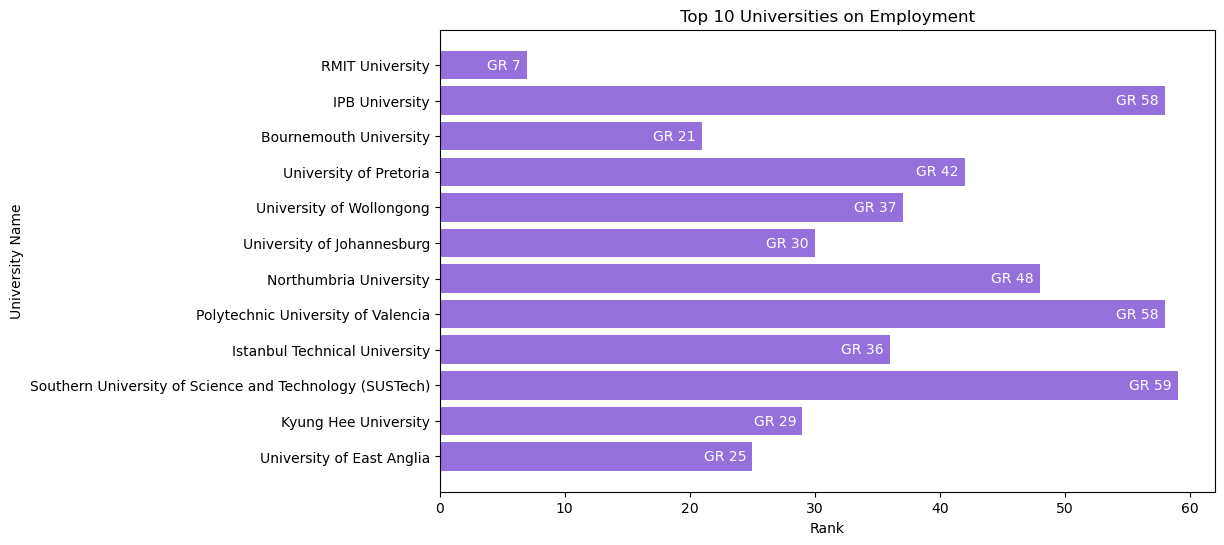

In [ ]:
# BONUS questions:
# Are there any university of the top 10 in employement factor appear in the top 10 globally ranking of world universities?
# Reason to ask this questions?

plt.figure(figsize=(10, 6))
bars = plt.barh(combined_df['University Name'],
                combined_df['Rank_new'],
                
                color='mediumpurple')

plt.xlabel('Rank')
plt.ylabel('University Name')
plt.title('Top 10 Universities on Employment')

for bar in bars:
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height()/2, 
             f'GR {int(bar.get_width())}', 
             va='center', ha='right', color='white')

plt.gca().invert_yaxis()  # Invert y-axis so the highest rank (1) is at the top
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

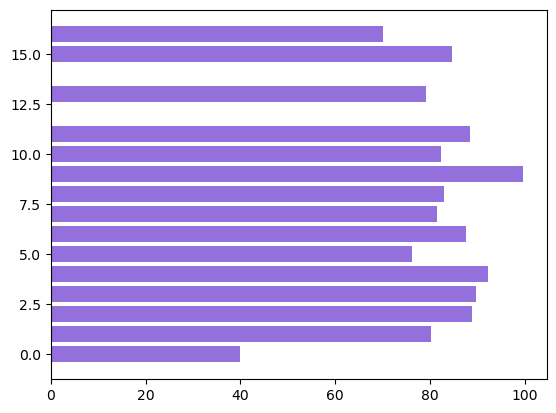

In [ ]:
plt.barh(times['Category 5'],
        times['Score 5'],
         color=('mediumpurple')
        
)
plt.show

In [ ]:
# What is left with Times:
# Checking outliers using statistics
# 1: Q3 
# 2: Q4
# 3: Q5

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

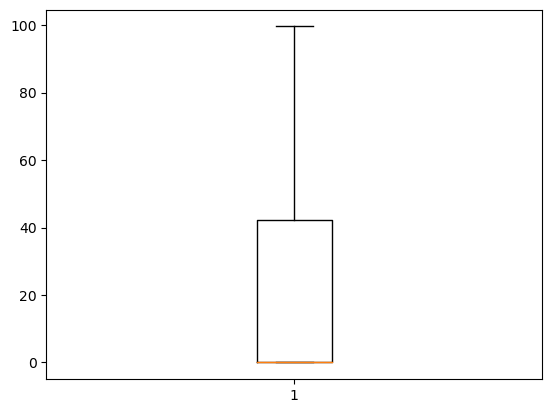

In [ ]:
plt.boxplot(times['Score 5'])
plt.show()

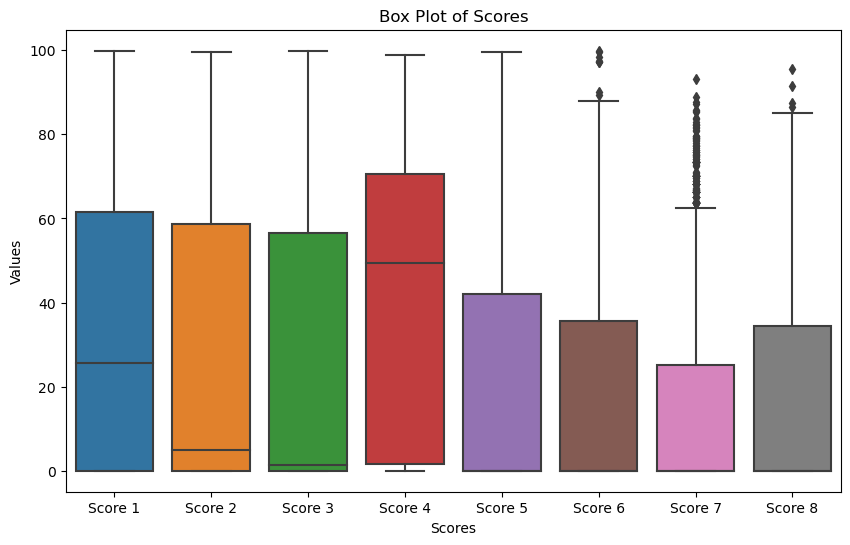

In [ ]:
data = times[['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5', 'Score 6', 'Score 7', 'Score 8']]
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Box Plot of Scores')
plt.xlabel('Scores')
plt.ylabel('Values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

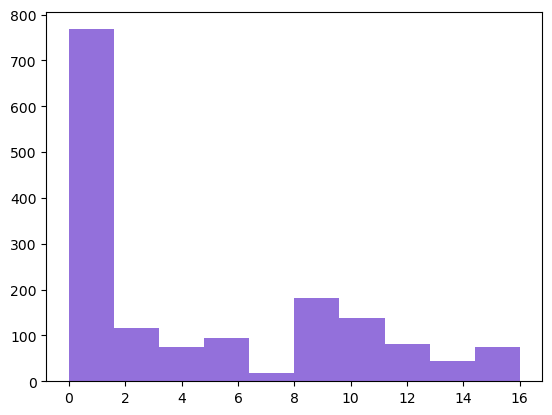

In [ ]:
# This shows the last universities that has minimum score which they are placed at the end of a ranking record
# this histogram might show us how many universisties answered the factor surveys in category 1, and we can do the same with others
plt.hist(times['Category 1'], 
            bins=10,
         color=('mediumpurple')


)
#plt.grid()
plt.show

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Q1: Which universities are ranked in the top 10 globally?

<function matplotlib.pyplot.show(close=None, block=None)>

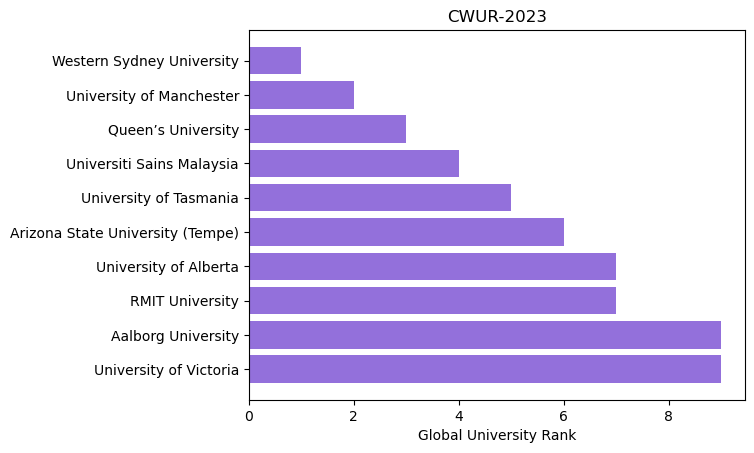

In [ ]:
# Q1 Answer- take it down at the end of cells later 
# BI-Varient visualization for two variebles
plt.barh(times['University Name'].head(10),
        times['Rank'].head(10),
        
        color=['mediumpurple']
       )
#plt.grid()
plt.xlabel('Global University Rank')
plt.title('CWUR-2023')
plt.gca().invert_yaxis()
plt.show
# show the number of ranking in each bar for university


# Q2: Which universities are ranked in the top 10 for employment outcomes? 

In [ ]:

# Category 1
cat_one = times.where((times['Category 1'] == 8))[['University Name','Category 1','Score 1']]
one_sort = cat_one.sort_values(by='Score 1', ascending=False)
one_sort.columns = ['University Name', 'Category', 'Scores']

# Category 2
cat_two = times.where((times['Category 2'] == 8))[['University Name','Category 2','Score 2']]
two_sort = cat_two.sort_values(by='Score 2', ascending=False)
two_sort.columns = ['University Name', 'Category', 'Scores']

# Category 3
cat_three = times.where((times['Category 3'] == 8))[['University Name','Category 3','Score 3']]
three_sort = cat_three.sort_values(by='Score 3', ascending=False)
three_sort.columns = ['University Name', 'Category', 'Scores']

# Category 5
cat_five = times.where((times['Category 5'] == 8))[['University Name','Category 5','Score 5']]
five_sort = cat_five.sort_values(by='Score 5', ascending=False)
five_sort.columns = ['University Name', 'Category', 'Scores']

# Category 6
cat_six = times.where((times['Category 6'] == 8))[['University Name','Category 6','Score 6']]
six_sort = cat_six.sort_values(by='Score 6', ascending=False)
six_sort.columns = ['University Name', 'Category', 'Scores']

# Category 7
cat_seven = times.where((times['Category 7'] == 8))[['University Name','Category 7','Score 7']]
seven_sort = cat_seven.sort_values(by='Score 7', ascending=False)
seven_sort.columns = ['University Name', 'Category', 'Scores']

# Category 8
cat_eight = times.where((times['Category 8'] == 8))[['University Name','Category 8','Score 8']]
eight_sort = cat_eight.sort_values(by='Score 8', ascending=False)
eight_sort.columns = ['University Name', 'Category', 'Scores']

# Combine all the sorted DataFrames
top10_employment = pd.concat([one_sort, two_sort, three_sort, five_sort, six_sort, seven_sort, eight_sort], axis=0).sort_values(by='Scores', ascending=False).head(13)

top10_employment


,University Name,Category,Scores
7,RMIT University,8.0,83.7
130,IPB University,8.0,83.7
28,Bournemouth University,8.0,83.0
68,University of Pretoria,8.0,82.5
61,University of Wollongong,8.0,82.1
45,University of Johannesburg,8.0,81.8
81,Northumbria University,8.0,81.3
163,Polytechnic University of Valencia,8.0,81.3
57,Istanbul Technical University,8.0,81.1
290,Southern University of Science and Technology ...,8.0,81.0


<function matplotlib.pyplot.show(close=None, block=None)>

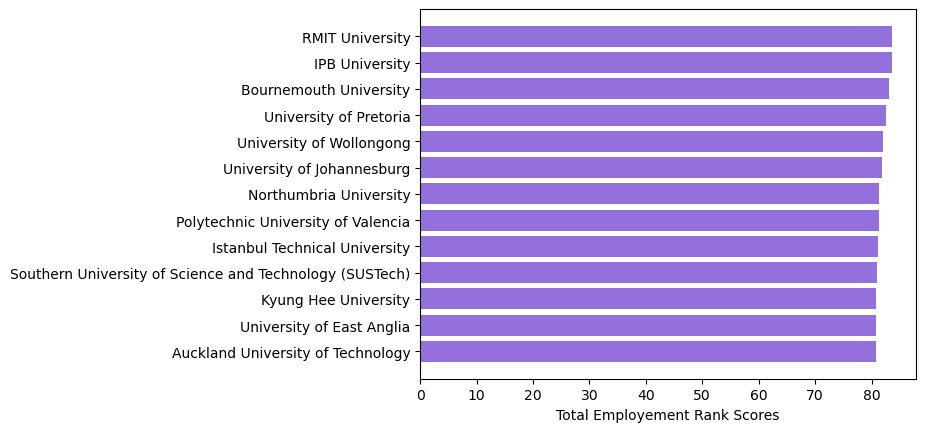

In [ ]:
plt.barh(top10_employment['University Name'],
        top10_employment['Scores'],
         color=('mediumpurple')
)

plt.xlabel('Total Employement Rank Scores')
plt.gca().invert_yaxis()
plt.show

# Q3: What positions do universities in Saudi Arabia hold within the global rankings?

In [ ]:
saudi_uni = times[times['Location'] == 'Saudi Arabia']
saudi_uni[['Rank', 'Rank_new', 'University Name', 'Total scores']]

,Rank,Rank_new,University Name,Total scores
136,101,58,King Abdullah University of Science and Techno...,82.2
137,101,58,King Faisal University,82.2
164,101,58,Prince Mohammad Bin Fahd University,82.2
205,201,59,AlMaarefa University,76.8
243,201,59,Imam Abdulrahman Bin Faisal University,76.8
244,201,59,Imam Mohammad Ibn Saud Islamic University,76.8
251,201,59,King Fahd University of Petroleum and Minerals,76.8
378,301,60,Prince Sultan University (PSU),72.7
482,401,61,King Khalid University,66.9
539,401,61,Qassim University,66.9


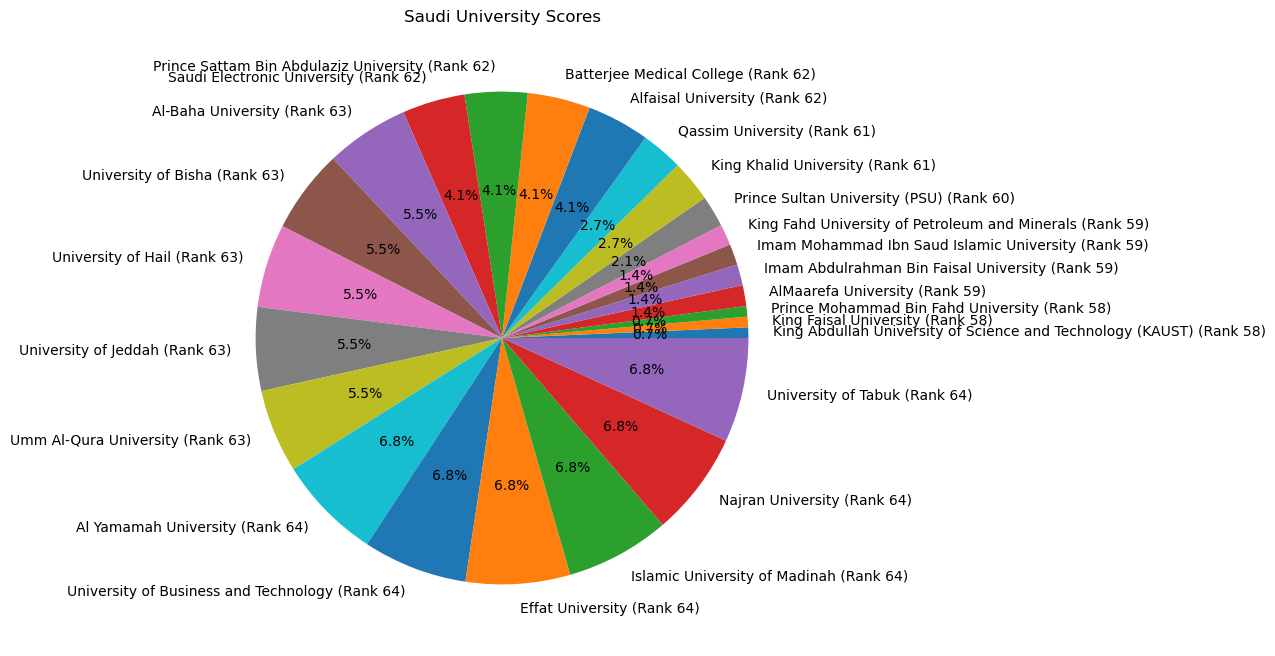

In [ ]:
plt.figure(figsize=(12, 8))

labels = [f"{name} (Rank {rank})" for name, rank in zip(saudi_uni['University Name'], saudi_uni['Rank_new'])]

plt.pie(
    saudi_uni['Rank'],
    labels=labels,  # using university names as labels
    autopct= '%1.1f%%',    # change it to be represened by the whole rank 
)

plt.title("Saudi University Scores")
plt.show()

In [ ]:
#times[times['Total scores'] ==74.4] #& (times['Total scores']>=76)].head()

# Q4: Considering various factors (variables) such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

In [ ]:
# Accourding to the data source website, they said the follwing: 
# SDG 17 accounts for 22 per cent of the total score, while the other SDGs each carry a weighting of 26 per cent.
# Evidence: https://www.timeshighereducation.com/world-university-rankings/impact-rankings-2024-methodology
# SDG 17 has more privilage for taking its rank, it is the parthnership for the goals
# ''Any university that provides data on SDG 17 and at least three other SDGs is included in the overall ranking''.
# ''A university’s total score in a given year is calculated by combining its score in SDG 17 with its best three results on the remaining 16 SDGs''.


# Q5: Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

In [ ]:
# The Times Impact ranking does not provide any clue about the national rank, only the global rank.
